Diberikan sebuah data water_potability.csv yang merupakan data metrik kualitas air yang mengandung 11 kolom sebagai berikut:

1. id
2. pH
3. Hardness
4. Solids
5. Chloramines
6. Sulfate
7. Conductivity
8. OrganicCarbon
9. Trihalomethanes
10. Turbidity
11. Potability

Kolom 2-10 adalah kolom atribut (non-target), sedangkan kolom 11 adalah kolom target.

# Tugas Besar - IF2220 - Probabilitas dan Statistika
## Penarikan Kesimpulan dan Pengujian Hipotesis
### Soal Tugas

Diberikan sebuah data water_potability.csv yang merupakan data metrik kualitas air yang mengandung 11 kolom sebagai berikut:

1. id
2. pH
3. Hardness
4. Solids
5. Chloramines
6. Sulfate
7. Conductivity
8. OrganicCarbon
9. Trihalomethanes
10. Turbidity
11. Potability

Kolom 2-10 adalah kolom atribut (non-target), sedangkan kolom 11 adalah kolom target.

In [112]:
from IPython.display import display, Markdown
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

colsName = ["id", 
            "pH", 
            "Hardness", 
            "Solids", 
            "Chloramines", 
            "Sulfate", 
            "Conductivity", 
            "OrganicCarbon", 
            "Trihalomethanes", 
            "Turbidity", 
            "Potability"]
wp = pd.read_csv("./water_potability.csv", names = colsName)
display(wp)

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


Anda diminta untuk melakukan analisis statistika sebagai berikut:

**1. Menulis deskripsi statistika (Descriptive Statistics)** 

dari semua kolom pada data yang bersifat numerik, terdiri dari 
- mean 
- median 
- modus 
- standar deviasi 
- variansi
- range
- nilai minimum 
- nilai maksimum 
- kuartil 
- IQR
- skewness
- kurtosis
    
Boleh juga ditambahkan deskripsi lain.

In [2]:

#wp = wp.drop(["id"], axis = 1)
wp_stats = pd.DataFrame(columns = colsName)

def concate_df(df_stats : pd.DataFrame, desc_stat) -> pd.DataFrame:
    if (isinstance(desc_stat, tuple)):
        return pd.concat([df_stats, desc_stat[0].to_frame(name = desc_stat[1]).T])
    else:
        return pd.concat([df_stats, desc_stat])

wp_stats = concate_df(wp_stats, (wp.mean(), "mean"))
wp_stats = concate_df(wp_stats, (wp.median(), "median"))
wp_stats = concate_df(wp_stats, (wp.std(), "std deviasi"))

range_stat = wp.describe().loc["max"] - wp.describe().loc["min"]
wp_stats = concate_df(wp_stats, (range_stat, "range"))

wp_stats = concate_df(wp_stats, (wp.min(), "min"))
wp_stats = concate_df(wp_stats, (wp.max(), "maks"))

quartile_stat = wp.describe().loc[["25%", "50%", "75%"]]
wp_stats = concate_df(wp_stats, quartile_stat)

IQR_stat = wp_stats.loc["75%"] - wp_stats.loc["25%"]
wp_stats = concate_df(wp_stats, (IQR_stat, "IQR"))

wp_stats = concate_df(wp_stats, (wp.skew(), "skewness"))
wp_stats = concate_df(wp_stats, (wp.kurt(), "kurtosis"))

display(wp_stats.head(13))

wp_mode_stat = wp.mode()
wp_mode_stat.index.name = "modus"
display(wp_mode_stat)

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
mean,1005.5,7.087193,195.969209,21904.673439,7.134322,333.211376,426.476708,14.35794,66.400717,3.969497,0.402985
median,1005.5,7.02949,197.203525,20926.882155,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.0
std deviasi,580.38134,1.572803,32.643166,8625.397911,1.585214,41.211111,80.701872,3.32577,16.081109,0.780471,0.49062
range,2009.0,13.772501,243.84589,56167.729801,11.736129,352.030642,551.722883,24.806707,115.422987,5.044749,1.0
min,1.0,0.227499,73.492234,320.942611,1.390871,129.0,201.619737,2.2,8.577013,1.45,0.0
maks,2010.0,14.0,317.338124,56488.672413,13.127,481.030642,753.34262,27.006707,124.0,6.494749,1.0
25%,503.25,6.090785,176.740657,15614.412962,6.138326,307.626986,366.619219,12.12253,55.949993,3.442882,0.0
50%,1005.5,7.02949,197.203525,20926.882155,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.0
75%,1507.75,8.053006,216.447589,27170.534649,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.0
IQR,1004.5,1.962221,39.706932,11556.121687,1.971607,51.641161,115.590553,4.561031,21.34462,1.071781,1.0


,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
modus,,,,,,,,,,,
0,1,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
1,2,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207,NaN
2,3,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101,NaN
3,4,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554,NaN
4,5,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678,NaN
2006,2007,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439,NaN
2007,2008,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161,NaN


**2.    Membuat visualisasi plot distribusi dalam bentuk histogram dan boxplot untuk setiap kolom numerik**

Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

In [2]:
def box_hist_plot(col_data):
    fig, (ax_box, ax_hist) = plt.subplots(  nrows = 2,
                                            figsize = (14,10),
                                            sharex = True,
                                            gridspec_kw = {"height_ratios": (.15, .85)})
    sns.set(style = "ticks")

    sns.boxplot(x = col_data, ax = ax_box)
    sns.histplot(x = col_data, kde = True, ax = ax_hist)

    ax_box.set(yticks = [])
    sns.despine(ax = ax_hist)
    sns.despine(ax = ax_box, left = True)

    plt.show()

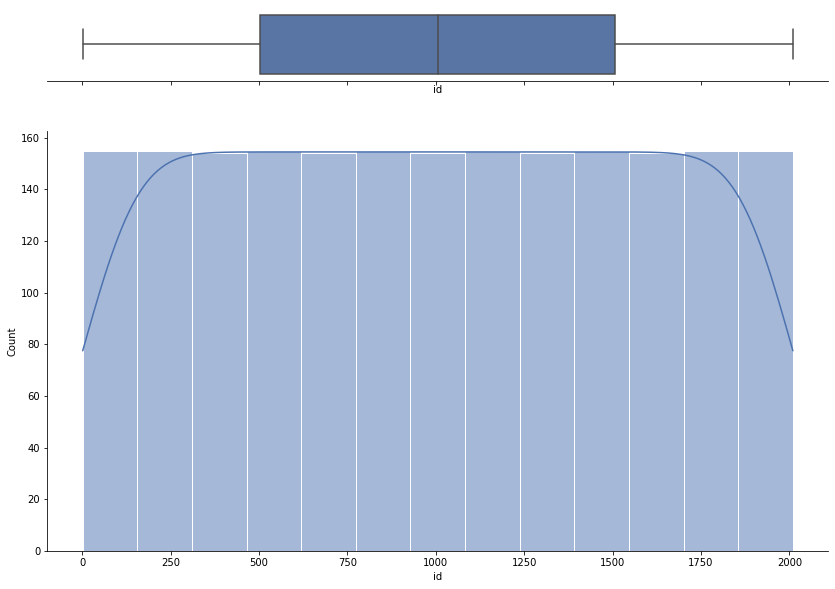

In [3]:
box_hist_plot(wp[colsName[0]])

**id**

Berdasarkan visualisasi kedua plot id di atas, terlihat bahwa data id terdistribusi normal dengan keruncingan yang relatif sangat landai. Perlu diperhatikan bawah data ini merupakan index dataset water_potability dan nilainya unik.

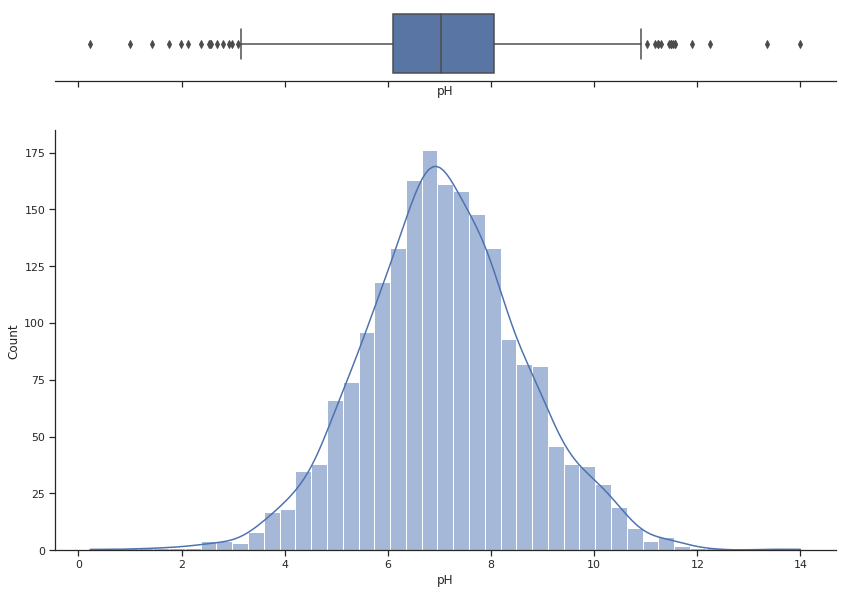

In [5]:
box_hist_plot(wp[colsName[1]])

**pH**

Berdasarkan kedua grafik pH di atas, terlihat bahwa data relatif mendekati terdistribusi normal, dengan nilai median pH dan modus porsiran pH yang relatif hampir sama. Terlihat juga bahwa data tervisualisasi relatif agak runcing. Selain itu, terdapat *outliers* atas dan bawah.

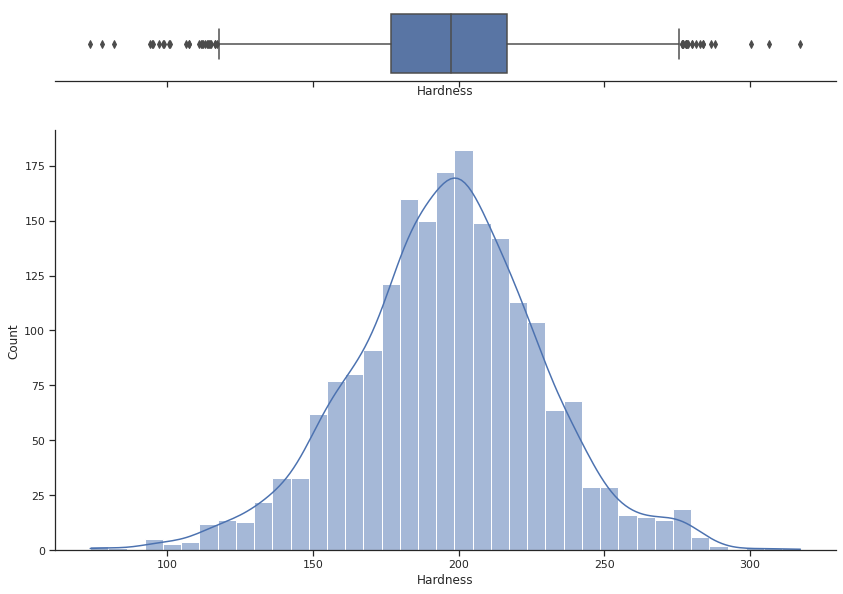

In [6]:
box_hist_plot(wp[colsName[2]])

***Hardness***

Seperti pada data pH, terlihat bahwa persebaran data *hardness* relatif mendekati terdistribusi normal. Namun, data *hardness* terlihat lebih tidak runcing dibandingkan data pH. Data *hardness* memiliki *outliers* atas dan bawah yang tampak lebih banyak dibandingkan data pH.

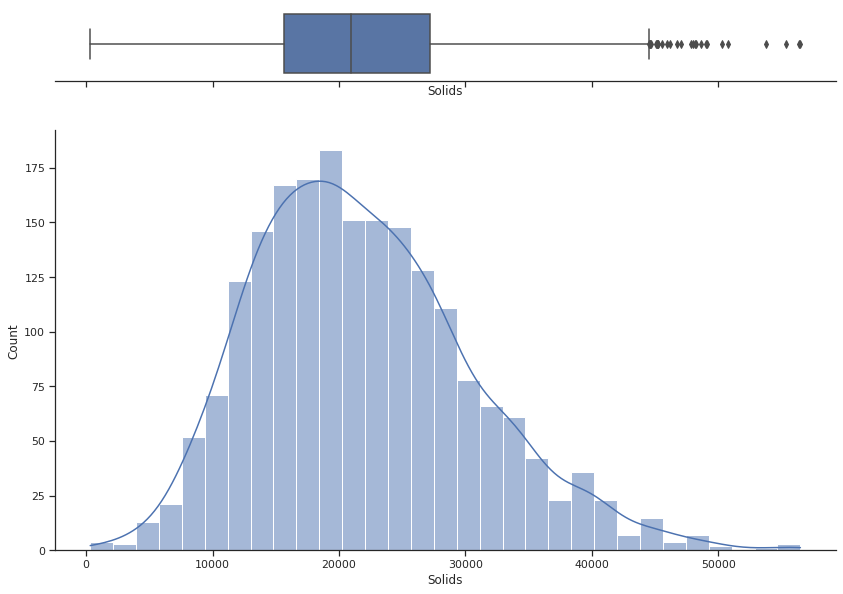

In [7]:
box_hist_plot(wp[colsName[3]])

***Solids***

Berdasarkan kedua grafik *solids* di atas, terlihat bahwa data *positivelyy skewed*, yakni persebaran data yang cenderung lebih banyak di nilai *solids* yang lebih kecil. Terlihat juga bahwa nilai porsiran modus data lebih kecil dibandingkan nilai median data. Median data atau nilai Q2 juga tampak lebih dekat dengan nilai Q1 dan elemen "minimum" dibandingkan dengan nilai Q3 dan elemen "maksimum". Selain itu, terlihat bahwa nilai *outliers* atas yang relatif banyak dan tidak ada nilai *outliers* bawah. Jika dibandingkan dengan data *hardness*, visualisasi data *solids* tampak relatif lebih landai.

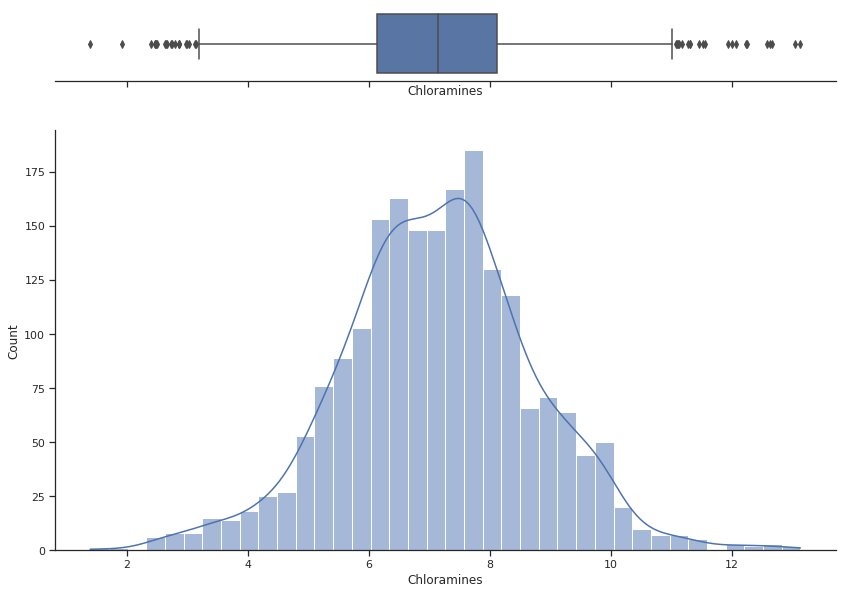

In [8]:
box_hist_plot(wp[colsName[4]])

***Chloramines***

Berdasarkan kedua grafik *chloramines* di atas, terlihat bahwa persebaran data relatif mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data relatif sedikit lebih besar dibandingkan nilai median data. Median data atau nilai Q2 juga relatif tampak simetris terhadap nilai Q1 & elemen "minimum" dan nilai Q3 & elemen "maksimum". Selain itu, terlihat bahwa terdapat *outliers* atas dan bawah. Visualisasi persebaran data terlihat relatif agak runcing.

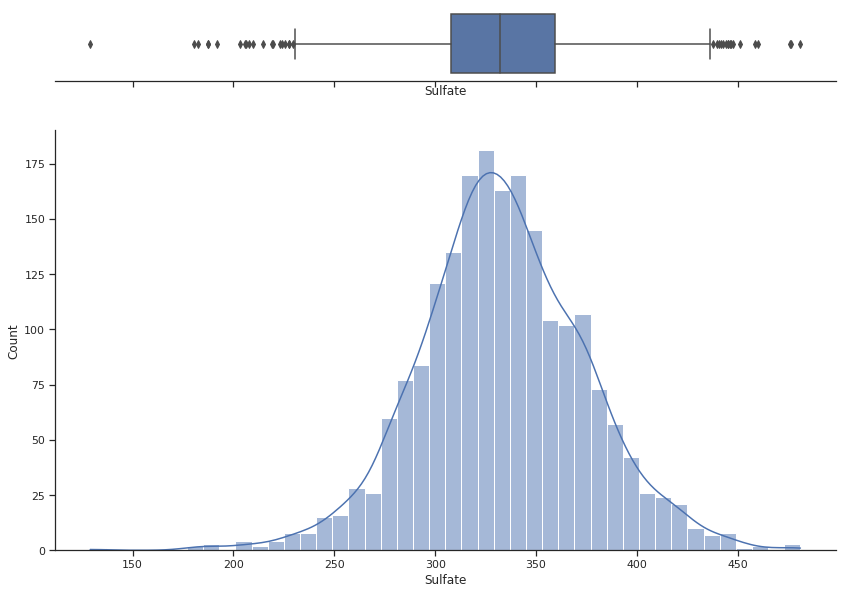

In [9]:
box_hist_plot(wp[colsName[5]])

***Sulfate***

Berdasarkan kedua grafik *sulfate* di atas, terlihat bahwa persebaran data relatif mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data relatif sedikit lebih kecil dibandingkan nilai median data. Median data atau nilai Q2 relatif sedikit lebih mendekati nilai Q1 & elemen "minimum" dibandingkan nilai Q3 & elemen "maksimum". Visualisasi persebaran data terlihat relatif lebih berada pada nilai *sulfate* yang lebih tinggi, salah satunya disebabkan terdapat *outliers* bawah yang nilainya relatif jauh lebih kecil dari elemen "minimum" boxplot dan *outliers* bawah lainnya. Visualisasi persebaran data juga terlihat relatif lebih runcing dibandingkan data *chloramines*.

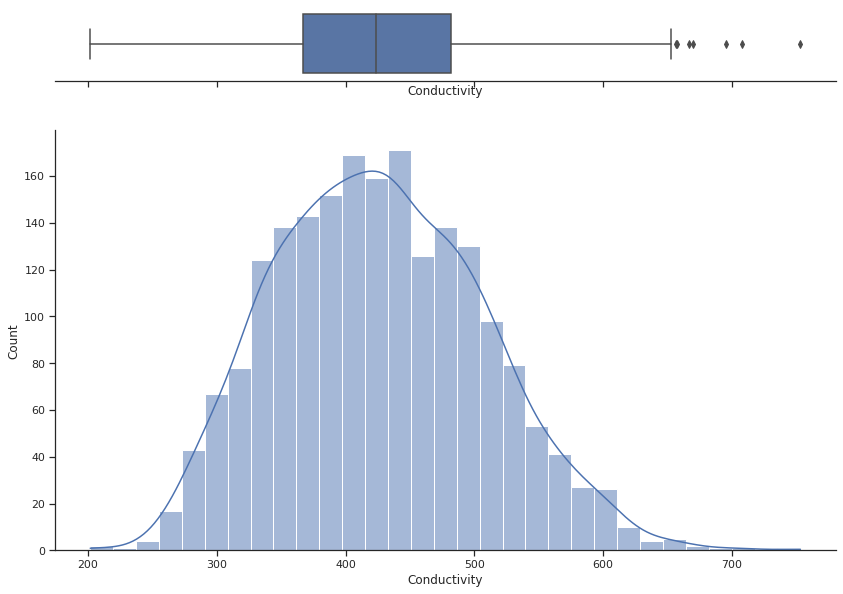

In [10]:
box_hist_plot(wp[colsName[6]])

***Conductivity***

Berdasarkan kedua grafik *conductivity* di atas, terlihat bahwa persebaran data relatif cukup mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data relatif sedikit lebih besar dibandingkan nilai median data. Namun, perlu diperhatikan bahwa terdapat satu porsiran data yang jumlahnya relatif hampir sama dengan nilai modus tersebut dan nilainya relatif sedikit lebih kecil dibandingkan median data. Terhadap nilai Q1 dan Q3, nilai median atau Q2 relatif hampir simetris. Pun, selisih nilai elemen "minimum" boxplot dan Q1 terhadap selisih nilai elemen "maksimum" boxplot dan Q3 tampak relatif hampir mirip. Visualisasi persebaran data terlihat relatif lebih berada pada nilai *conductivity* yang lebih kecil, salah satunya disebabkan terdapat beberapa *outliers* atas, tetapi tidak terdapat nilai *outliers* bawah. Visualisasi persebaran data juga terlihat relatif cukup landai.

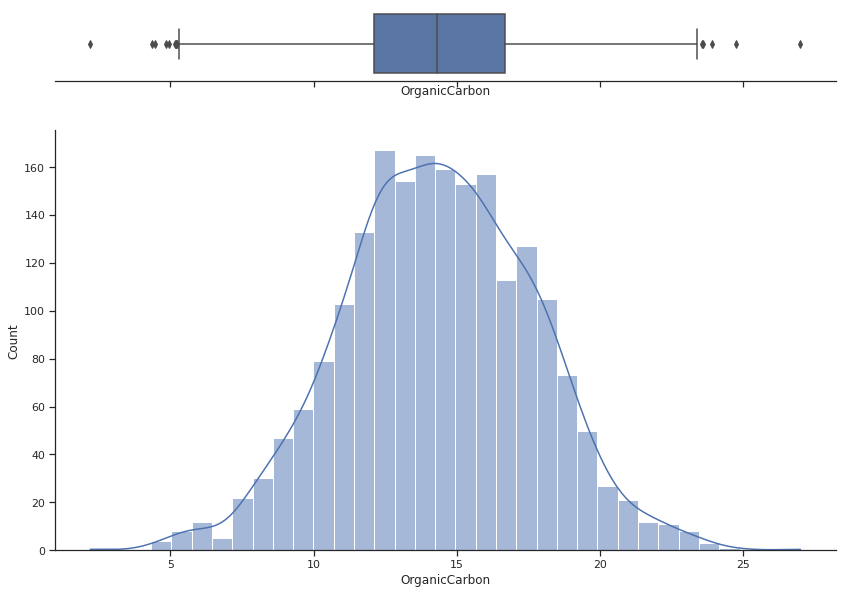

In [11]:
box_hist_plot(wp[colsName[7]])

***OrganicCarbon***

Berdasarkan kedua grafik *OrganicCarbon* di atas, terlihat bahwa persebaran data relatif cukup mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data lebih kecil dibandingkan nilai median data. Namun, perlu diperhatikan bahwa nilai-nilai porsiran data yang jumlahnya relatif hampir sama dengan nilai modus, seluruhnya relatif mendekati median dan nilainya lebih besar daripada nilai modus. Terhadap nilai Q1 dan Q3, nilai median atau Q2 relatif hampir simetris. Pun, selisih nilai elemen "minimum" boxplot dan Q1 terhadap selisih nilai elemen "maksimum" boxplot dan Q3 tampak relatif hampir sama. Terdapat *outliers* bawah dan atas. Baik *outliers* bawah maupun atas, terdapat *outlier* yang nilainya relatif cukup jauh terhadap nilai *outliers* lainnya (pada kelompoknya) dan juga terhadap nilai elemen "minimum" atau "maksimum" boxplot. Visualisasi persebaran data terlihat relatif sedang, yaitu tidak terlalu runcing dan tidak terlalu landai.

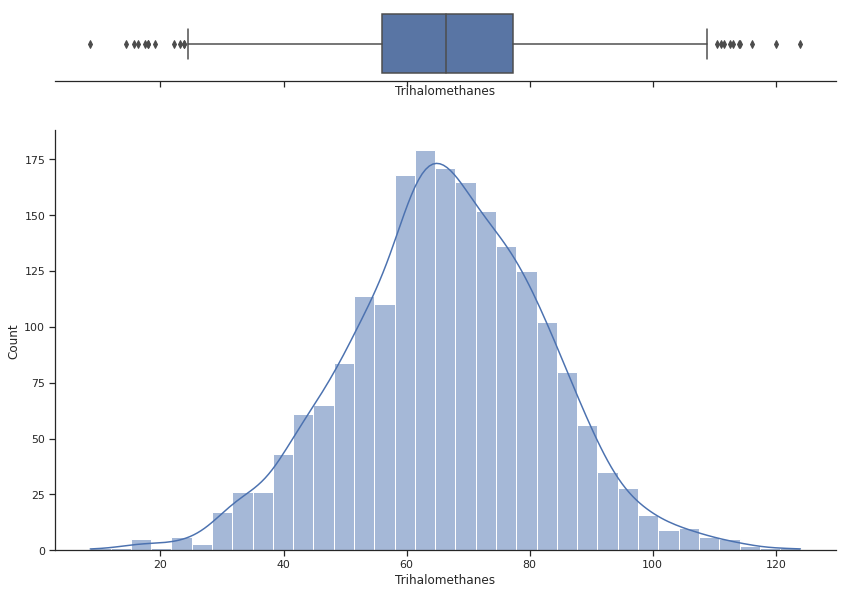

In [12]:
box_hist_plot(wp[colsName[8]])

***Trihalomethanes***

Berdasarkan kedua grafik *trihalomethanes* di atas, terlihat bahwa persebaran data relatif cukup mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data relatif sedikit lebih kecil dibandingkan nilai median data. Terhadap nilai Q1 dan Q3, nilai median atau Q2 relatif hampir simetris. Pun, selisih nilai elemen "minimum" boxplot dan Q1 terhadap selisih nilai elemen "maksimum" boxplot dan Q3 tampak relatif hampir sama. Terdapat *outliers* bawah dan atas. Visualisasi persebaran data terlihat relatif cukup runcing.

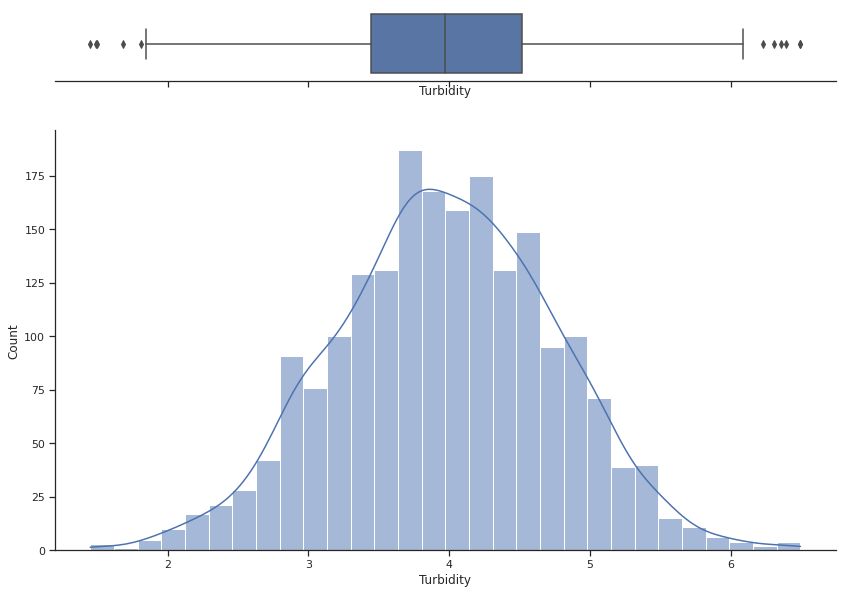

In [13]:
box_hist_plot(wp[colsName[9]])

***Turbidity***

Berdasarkan kedua grafik *turbidity* di atas, terlihat bahwa persebaran data relatif mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data relatif lebih kecil dibandingkan nilai median data. Namun, terdapat beberapa nilai yang banyaknya relatif mirip dengan nilai modus data dan nilai tersebut lebih besar dibandingkan nilai modus data. Terhadap nilai Q1 dan Q3, nilai median atau Q2 relatif hampir simetris. Pun, selisih nilai elemen "minimum" boxplot dan Q1 terhadap selisih nilai elemen "maksimum" boxplot dan Q3 tampak relatif hampir sama. Terdapat relatif sedikit *outliers* bawah dan atas. Visualisasi persebaran data terlihat relatif cukup landai.

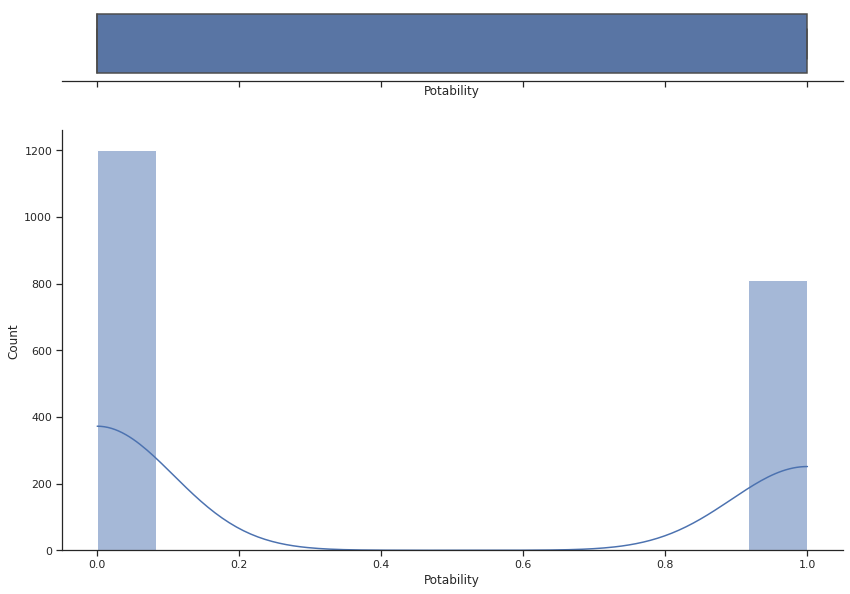

In [14]:
box_hist_plot(wp[colsName[10]])

***Potability***

Berdasarkan kedua grafik *potability* di atas, dapat dilihat bahwa data *potability* hanya bernilai 0 atau 1. Terlihat juga bahwa data *potability* memiliki nilai modus dan median nol. Karena nilai 0 yang dapat dipastikan lebih banyak dibandingkan nilai 1, distribusi data relatif sedikit *positively skewed*.


**3. Menentukan setiap kolom numerik berdistribusi normal atau tidak**

Normality test dilakukan dengan menggunakan library scipy.stats.normaltest() untuk masing-masing kolom, dengan alpha = 0.055.


In [243]:

for col in colsName[1:10]:
    k2, pvalue = st.normaltest(wp[col])

    # bandingkan pvalue dengan alpha = 0.05
    if (pvalue < 0.05):
        print("Kolom '" + col + "' tidak terdistribusi normal\n")
    else:
        print("Kolom '" + col + "' terdistribusi normal\n")

Kolom 'pH' tidak terdistribusi normal

Kolom 'Hardness' tidak terdistribusi normal

Kolom 'Solids' tidak terdistribusi normal

Kolom 'Chloramines' tidak terdistribusi normal

Kolom 'Sulfate' tidak terdistribusi normal

Kolom 'Conductivity' tidak terdistribusi normal

Kolom 'OrganicCarbon' terdistribusi normal

Kolom 'Trihalomethanes' terdistribusi normal

Kolom 'Turbidity' terdistribusi normal



**4. Melakukan test hipotesis 1 sampel**

dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [225]:
def calc_mean_z(data_mean, hyp_mean, data_std, tot_data):
    return tot_data**(0.5)*(data_mean - hyp_mean)/data_std

def calc_bin_z(real_prop, obs_prop, n_data):
    return (real_prop - obs_prop)/(obs_prop*(1-obs_prop)/n_data)**0.5

SAMPLE_SIZE = 345

sample_wp = wp.sample(SAMPLE_SIZE)



Dari total 2010 data, akan digunakan 345 sampel data untuk dilakukan pengujian hipotesis.

#### 4.a. Nilai rata-rata pH di atas 7?

**1. Menentukan hipotesis nol**

- $H_{0}: \mu_{pH} = 7$



**2. Pilih hipotesis alternatif**

Dengan menerapkan **one-tailed-test** maka $H_{1}$ akan ditentukan sebagai berikut.

- $H_{1}: \mu_{pH} > 7$



**3. Menentukan tingkat signifikan $\alpha$**

- $\alpha = 0.05$



**4. Menentukan uji statistik dan daerah kritis**

Dengan menguji terhadap **distribusi normal $Z$**, didapat daerah kritis sebagai berikut.

- $z > z_{0.05} = 1.6448536269514722$



**5. Menghitung nilai uji statistik**

- $z = \frac{\bar{x} - \mu_{0}}{\frac{\sigma}{\sqrt{n}}}\\z = 2.3128181867122457$

Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di daerah kritis, yaitu

- $z = 2.3128181867122457 > z_{0.05} = 1.6448536269514722$

maka $H_{0}$ ditolak



**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**

- $P(Z > 2.3128181867122457) = 0.010366318718799753$

Dengan turut mengevaluasi terhadap nilai-$P$, yaitu

- $P(Z > 2.3128181867122457) = 0.010366318718799753 < \alpha = 0.05$

maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni nilai rata-rata pH adalah di atas 7

<AxesSubplot:>

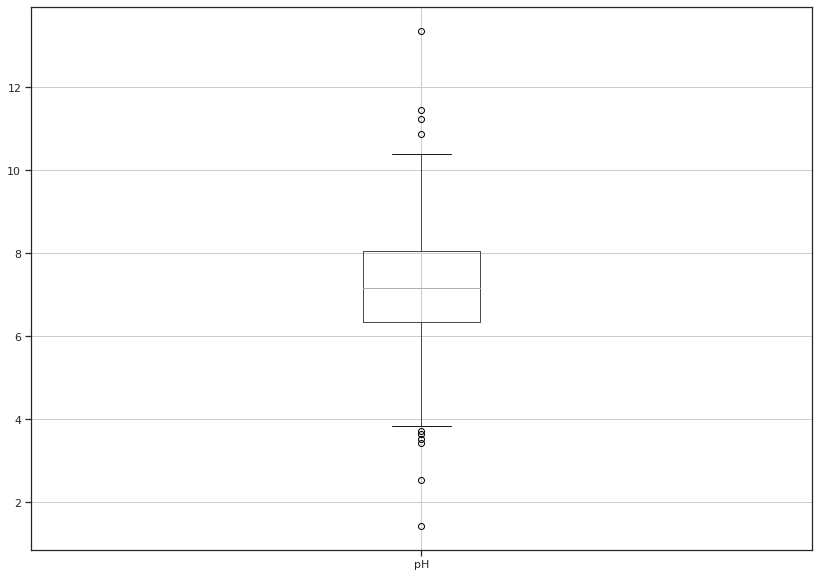

In [230]:
display(Markdown("#### 4.a. Nilai rata-rata pH di atas 7?"))

display(Markdown(
                    "**1. Menentukan hipotesis nol**\n\n"

                    "- $"
                    "H_{0}: \\mu_{pH} = 7"
                    "$\n\n"
                ))

display(Markdown(   
                    "**2. Pilih hipotesis alternatif**\n\n"

                    "Dengan menerapkan **one-tailed test** maka $H_{1}$ akan ditentukan sebagai berikut.\n\n"

                    "- $"
                    "H_{1}: \\mu_{pH} > 7"
                    "$\n\n"
                ))


display(Markdown(   
                    "**3. Menentukan tingkat signifikan $\\alpha$**\n\n"

                    "- $"
                    "\\alpha = 0.05"
                    "$\n\n"
                ))

z_alpha = st.norm.ppf(1-.05)
display(Markdown(   
                    "**4. Menentukan uji statistik dan daerah kritis**\n\n"

                    "Dengan menguji terhadap **distribusi normal $Z$**, didapat daerah kritis sebagai berikut.\n\n"

                    "- $"
                    "z > z_{0.05} = " + str(z_alpha) + 
                    "$\n\n"
                ))

z_val = calc_mean_z(sample_wp["pH"].mean(), 7, sample_wp["pH"].std(), SAMPLE_SIZE)
display(Markdown(   
                    "**5. Menghitung nilai uji statistik**\n\n"

                    "- $"
                    "z = \\frac{\\bar{x} - \\mu_{0}}{\\frac{\\sigma}{\\sqrt{n}}}\\\\"
                    "z = " + str(z_val) +
                    "$\n\n"

                    "Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di daerah kritis, yaitu\n\n"
                    "- $"
                    "z = " + str(z_val) + " > z_{0.05} = " + str(z_alpha) +
                    "$\n\n" 
                    
                    "maka $H_{0}$ ditolak\n\n"
                ))

p_val = st.norm.sf(abs(z_val))
display(Markdown(
                    "**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**\n\n"

                    "- $"
                    "P(Z > " + str(z_val) +") = " + str(p_val) +
                    "$\n\n"

                    "Dengan turut mengevaluasi terhadap nilai-$P$, yaitu\n\n"
                    "- $"
                    "P(Z > " + str(z_val) +") = " + str(p_val) + " < \\alpha = 0.05"
                    "$\n\n" 
                    
                    "maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni nilai rata-rata pH adalah di atas 7"
                ))

sample_wp.boxplot(["pH"], figsize=(14,10))

#### 4.b. Nilai rata-rata Hardness tidak sama dengan 205?

**1. Menentukan hipotesis nol**

- $H_{0}: \mu_{hardness} = 205$



**2. Pilih hipotesis alternatif**

Dengan menerapkan **two-tailed-test** maka $H_{1}$ akan ditentukan sebagai berikut.

- $H_{1}: \mu_{hardness} \neq 205$



**3. Menentukan tingkat signifikan $\alpha$**

- $\alpha = 0.05$



**4. Menentukan uji statistik dan daerah kritis**

Dengan menguji terhadap **distribusi normal $Z$**, didapat daerah-daerah kritis sebagai berikut.

- $z > z_{0.025} = 1.959963984540054\\z < z_{0.025} = -1.959963984540054$



**5. Menghitung nilai uji statistik**

- $z = \frac{\bar{x} - \mu_{0}}{\frac{\sigma}{\sqrt{n}}}\\z = -4.7703007529487875$

Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu

- $z = -4.7703007529487875 < z_{0.025} = -1.959963984540054$

maka $H_{0}$ ditolak



**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**

- $P(Z < 4.7703007529487875) = 9.197553041797199e-07$

Dengan turut mengevaluasi terhadap nilai-$P$, yaitu

- $P(Z < 4.7703007529487875) = 9.197553041797199e-07 < \alpha = 0.05$

maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni nilai rata-rata $Hardness$ tidak sama dengan 205

<AxesSubplot:>

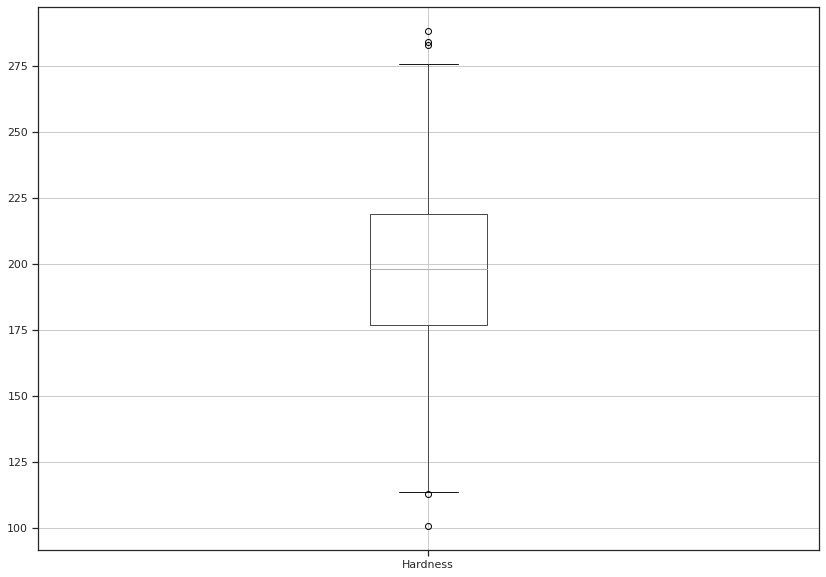

In [231]:
display(Markdown("#### 4.b. Nilai rata-rata Hardness tidak sama dengan 205?"))

display(Markdown(
                    "**1. Menentukan hipotesis nol**\n\n"

                    "- $"
                    "H_{0}: \\mu_{hardness} = 205"
                    "$\n\n"
                ))

display(Markdown(   
                    "**2. Pilih hipotesis alternatif**\n\n"

                    "Dengan menerapkan **two-tailed test** maka $H_{1}$ akan ditentukan sebagai berikut.\n\n"

                    "- $"
                    "H_{1}: \\mu_{hardness} \\neq 205"
                    "$\n\n"
                ))


display(Markdown(   
                    "**3. Menentukan tingkat signifikan $\\alpha$**\n\n"

                    "- $"
                    "\\alpha = 0.05"
                    "$\n\n"
                ))

z_alpha = st.norm.ppf(1-.025)
display(Markdown(   
                    "**4. Menentukan uji statistik dan daerah kritis**\n\n"

                    "Dengan menguji terhadap **distribusi normal $Z$**, didapat daerah-daerah kritis sebagai berikut.\n\n"

                    "- $"
                    "z > z_{0.025} = " + str(z_alpha) + "\\\\"
                    "z < -z_{0.025} = " + str(-z_alpha) + 
                    "$\n\n"
                ))

z_val = calc_mean_z(sample_wp["Hardness"].mean(), 205, sample_wp["Hardness"].std(), SAMPLE_SIZE)
display(Markdown(   
                    "**5. Menghitung nilai uji statistik**\n\n"

                    "- $"
                    "z = \\frac{\\bar{x} - \\mu_{0}}{\\frac{\\sigma}{\\sqrt{n}}}\\\\"
                    "z = " + str(z_val) +
                    "$\n\n"

                    "Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu\n\n"
                    "- $"
                    "z = " + str(z_val) + " < -z_{0.025} = " + str(-z_alpha) +
                    "$\n\n" 
                    
                    "maka $H_{0}$ ditolak\n\n"
                ))

p_val = st.norm.sf(abs(z_val))
display(Markdown(
                    "**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**\n\n"

                    "- $"
                    "P(Z < " + str(-z_val) +") = " + str(p_val) +
                    "$\n\n"

                    "Dengan turut mengevaluasi terhadap nilai-$P$, yaitu\n\n"
                    "- $"
                    "P(Z < " + str(-z_val) +") = " + str(p_val) + " < \\alpha = 0.05"
                    "$\n\n" 
                    
                    "maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni nilai rata-rata $Hardness$ tidak sama dengan 205"
                ))

sample_wp.boxplot(["Hardness"], figsize=(14,10))

- Nilai Rata-rata Hardness tidak sama dengan 205?

#### 4.c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

**1. Menentukan hipotesis nol**

- $H_{0}: \mu_{Solids_{1,100}} = 21900$



**2. Pilih hipotesis alternatif**

Dengan menerapkan **two-tailed-test** maka $H_{1}$ akan ditentukan sebagai berikut.

- $H_{1}: \mu_{Solids_{1,100}} \neq 21900$



**3. Menentukan tingkat signifikan $\alpha$**

- $\alpha = 0.05$



**4. Menentukan uji statistik dan daerah kritis**

Dengan menguji terhadap **distribusi normal $z$**, didapat daerah-daerah kritis sebagai berikut.

- $z > z_{0.025} = 1.959963984540054\\z < -z_{0.025} = -1.959963984540054$



**5. Menghitung nilai uji statistik**

- $z = \frac{\bar{x} - \mu_{0}}{\frac{\sigma}{\sqrt{n}}}\\z = -2.958268607752774$

Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu

- $z = -2.958268607752774 < -z_{0.025} = -1.959963984540054$

maka $H_{0}$ ditolak



**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**

- $P(Z < 2.958268607752774) = 0.0015468620639002273$

Dengan turut mengevaluasi terhadap nilai-$P$, yaitu

- $P(Z < 2.958268607752774) = 0.0015468620639002273 < \alpha = 0.05$

maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni nilai Rata-rata 100 baris pertama kolom Solids bukan 21900

<AxesSubplot:>

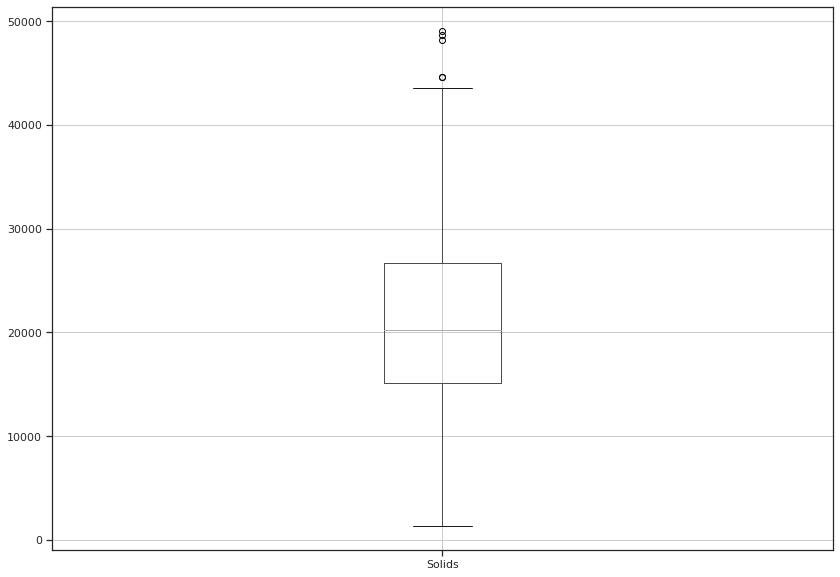

In [242]:
display(Markdown("#### 4.c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?"))

display(Markdown(
                    "**1. Menentukan hipotesis nol**\n\n"

                    "- $"
                    "H_{0}: \\mu_{Solids_{1,100}} = 21900"
                    "$\n\n"
                ))

display(Markdown(   
                    "**2. Pilih hipotesis alternatif**\n\n"

                    "Dengan menerapkan **two-tailed test** maka $H_{1}$ akan ditentukan sebagai berikut.\n\n"

                    "- $"
                    "H_{1}: \\mu_{Solids_{1,100}} \\neq 21900"
                    "$\n\n"
                ))


display(Markdown(   
                    "**3. Menentukan tingkat signifikan $\\alpha$**\n\n"

                    "- $"
                    "\\alpha = 0.05"
                    "$\n\n"
                ))

z_alpha = st.norm.ppf(1-.025)
display(Markdown(   
                    "**4. Menentukan uji statistik dan daerah kritis**\n\n"

                    "Dengan menguji terhadap **distribusi normal $z$**, didapat daerah-daerah kritis sebagai berikut.\n\n"

                    "- $"
                    "z > z_{0.025} = " + str(z_alpha) + "\\\\"
                    "z < -z_{0.025} = " + str(-z_alpha) + 
                    "$\n\n"
                ))


z_val = calc_mean_z(sample_wp["Solids"].iloc[:100].mean(), 21900, sample_wp["Solids"].iloc[:100].std(), SAMPLE_SIZE)
display(Markdown(   
                    "**5. Menghitung nilai uji statistik**\n\n"

                    "- $"
                    "z = \\frac{\\bar{x} - \\mu_{0}}{\\frac{\\sigma}{\\sqrt{n}}}\\\\"
                    "z = " + str(z_val) +
                    "$\n\n"

                    "Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu\n\n"
                    "- $"
                    "z = " + str(z_val) + " < -z_{0.025} = " + str(-z_alpha) +
                    "$\n\n" 
                    
                    "maka $H_{0}$ ditolak\n\n"
                ))

p_val = st.norm.sf(abs(z_val))
display(Markdown(
                    "**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**\n\n"

                    "- $"
                    "P(Z < " + str(-z_val) +") = " + str(p_val) +
                    "$\n\n"

                    "Dengan turut mengevaluasi terhadap nilai-$P$, yaitu\n\n"
                    "- $"
                    "P(Z < " + str(-z_val) +") = " + str(p_val) + " < \\alpha = 0.05"
                    "$\n\n" 
                    
                    "maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni nilai Rata-rata 100 baris pertama kolom Solids bukan 21900"
                ))

sample_wp.boxplot(["Solids"], figsize=(14,10))


#### 4.d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

**1. Menentukan hipotesis nol**

- $H_{0}: P_{conductivity > 450} = 10\%$



**2. Pilih hipotesis alternatif**

Dengan menerapkan ***two-tailed test*** maka $H_{1}$ akan ditentukan sebagai berikut.

- $H_{1}: P_{conductivity > 450} \neq 10\%$



**3. Menentukan tingkat signifikan $\alpha$**

- $\alpha = 0.05$



**4. Menentukan uji statistik dan daerah kritis**

Dengan menguji terhadap **Binomial didekati normal**, didapat daerah-daerah kritis sebagai berikut.

- $z > z_{0.025} = 1.959963984540054\\z < z_{0.025} = -1.959963984540054$



**5. Menghitung nilai uji statistik**

- $z = \frac{\hat{p} - p_{0}}{\sqrt{\frac{p_{0}q_{0}}{n}}}\\\\ \\\hat{p} = 0.3710144927536232\\p_{0} = 0.1\\q_{0} = 0.9\\ \\z = 16.779569280812822$

Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu

- $z = 16.779569280812822 > z_{0.025} = 1.959963984540054$

maka $H_{0}$ ditolak



**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**

- $P(Z > 16.779569280812822) = 1.721622136566945e-63$

Dengan turut mengevaluasi terhadap nilai-$P$, yaitu

- $P(Z > 16.779569280812822) = 1.721622136566945e-63 < \alpha = 0.05$

maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%

<AxesSubplot:>

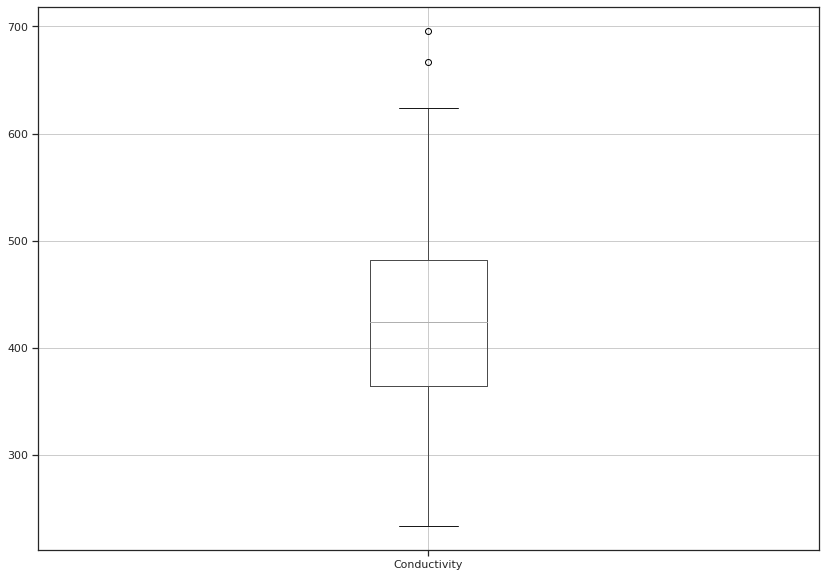

In [232]:
display(Markdown("#### 4.d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?"))

display(Markdown(
                    "**1. Menentukan hipotesis nol**\n\n"

                    "- $"
                    "H_{0}: P_{conductivity > 450} = 10\\%"
                    "$\n\n"
                ))

display(Markdown(   
                    "**2. Pilih hipotesis alternatif**\n\n"

                    "Dengan menerapkan ***two-tailed test*** maka $H_{1}$ akan ditentukan sebagai berikut.\n\n"

                    "- $"
                    "H_{1}: P_{conductivity > 450} \\neq 10\\%"
                    "$\n\n"
                ))


display(Markdown(   
                    "**3. Menentukan tingkat signifikan $\\alpha$**\n\n"

                    "- $"
                    "\\alpha = 0.05"
                    "$\n\n"
                ))

z_alpha = st.norm.ppf(1-.025)
display(Markdown(   
                    "**4. Menentukan uji statistik dan daerah kritis**\n\n"

                    "Dengan menguji terhadap **Binomial didekati normal**, didapat daerah-daerah kritis sebagai berikut.\n\n"

                    "- $"
                    "z > z_{0.025} = " + str(z_alpha) + "\\\\"
                    "z < -z_{0.025} = " + str(-z_alpha) + 
                    "$\n\n"
                ))

tot_obs_data = len(sample_wp["Conductivity"].loc[sample_wp["Conductivity"] > 450])
sample_prop = tot_obs_data / SAMPLE_SIZE
z_val = calc_bin_z(sample_prop, 0.1, SAMPLE_SIZE)
display(Markdown(   
                    "**5. Menghitung nilai uji statistik**\n\n"

                    "- $"
                    "z = \\frac{\\hat{p} - p_{0}}{\\sqrt{\\frac{p_{0}q_{0}}{n}}}\\\\"
                    "\\\\ \\\\"
                    "\\hat{p} = " + str(sample_prop) +
                    "\\\\"
                    "p_{0} = 0.1" 
                    "\\\\"
                    "q_{0} = 0.9"
                    "\\\\ \\\\"
                    "z = " + str(z_val) +
                    "$\n\n"

                    "Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu\n\n"
                    "- $"
                    "z = " + str(z_val) + " > z_{0.025} = " + str(z_alpha) +
                    "$\n\n" 
                    
                    "maka $H_{0}$ ditolak\n\n"
                ))

p_val = st.norm.sf(abs(z_val))
display(Markdown(
                    "**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**\n\n"

                    "- $"
                    "P(Z > " + str(z_val) +") = " + str(p_val) +
                    "$\n\n"

                    "Dengan turut mengevaluasi terhadap nilai-$P$, yaitu\n\n"
                    "- $"
                    "P(Z > " + str(z_val) +") = " + str(p_val) + " < \\alpha = 0.05"
                    "$\n\n" 
                    
                    "maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%"
                ))

sample_wp.boxplot(["Conductivity"], figsize = (14,10))


#### 4.e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

**1. Menentukan hipotesis nol**

- $H_{0}: P_{Trihalomethanes < 450} = 5\%$



**2. Pilih hipotesis alternatif**

Dengan menerapkan ***one-tailed test*** maka $H_{1}$ akan ditentukan sebagai berikut.

- $H_{0}: P_{Trihalomethanes < 450} < 5\%$



**3. Menentukan tingkat signifikan $\alpha$**

- $\alpha = 0.05$



**4. Menentukan uji statistik dan daerah kritis**

Dengan menguji terhadap **Binomial didekati normal**, didapat daerah kritis sebagai berikut.

- $z < -z_{0.05} = -1.6448536269514722$



**5. Menghitung nilai uji statistik**

- $z = \frac{\hat{p} - p_{0}}{\sqrt{\frac{p_{0}q_{0}}{n}}}\\\\ \\\hat{p} = 0.034782608695652174\\p_{0} = 0.05\\q_{0} = 0.95\\ \\z = -1.296889431214681$

Berdasarkan pengujian tersebut, karena nilai uji $z$ tidak berada di daerah kritis, yaitu

- $z = -1.296889431214681 > z_{0.05} = -1.6448536269514722$

maka $H_{0}$ gagal ditolak



**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**

- $P(Z < -1.296889431214681) = 0.09733461673612476$

Dengan turut mengevaluasi terhadap nilai-$P$, yaitu

- $P(Z < -1.296889431214681) = 0.09733461673612476 > \alpha = 0.05$

maka benar bahwa $H_{0}$ gagal ditolak sehingga proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

<AxesSubplot:>

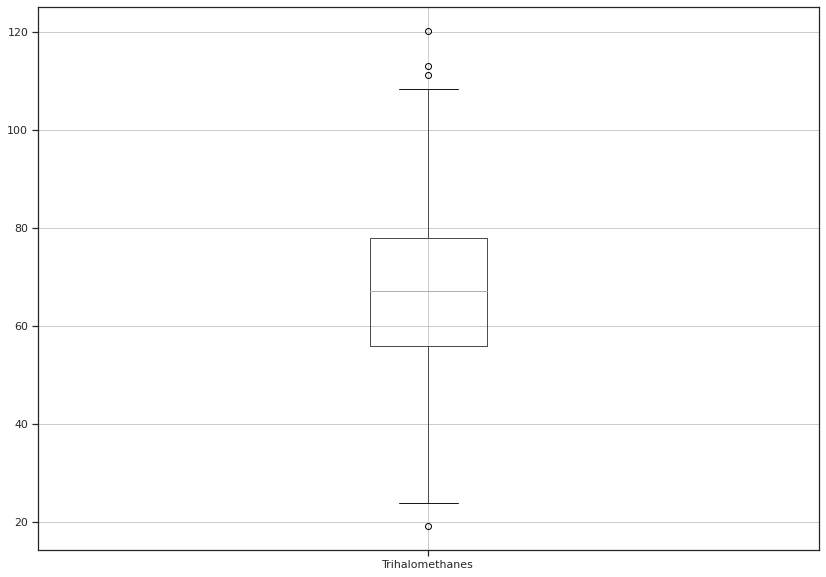

In [238]:
display(Markdown("#### 4.e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?"))

display(Markdown(
                    "**1. Menentukan hipotesis nol**\n\n"

                    "- $"
                    "H_{0}: P_{Trihalomethanes < 450} = 5\\%"
                    "$\n\n"
                ))

display(Markdown(   
                    "**2. Pilih hipotesis alternatif**\n\n"

                    "Dengan menerapkan ***one-tailed test*** maka $H_{1}$ akan ditentukan sebagai berikut.\n\n"

                    "- $"
                    "H_{1}: P_{Trihalomethanes < 450} < 5\\%"
                    "$\n\n"
                ))


display(Markdown(   
                    "**3. Menentukan tingkat signifikan $\\alpha$**\n\n"

                    "- $"
                    "\\alpha = 0.05"
                    "$\n\n"
                ))

z_alpha = st.norm.ppf(1-.05)
display(Markdown(   
                    "**4. Menentukan uji statistik dan daerah kritis**\n\n"

                    "Dengan menguji terhadap **Binomial didekati normal**, didapat daerah kritis sebagai berikut.\n\n"

                    "- $"
                    "z < -z_{0.05} = " + str(-z_alpha) + 
                    "$\n\n"
                ))

tot_obs_data = len(sample_wp["Trihalomethanes"].loc[sample_wp["Trihalomethanes"] < 40])
sample_prop = tot_obs_data / SAMPLE_SIZE
z_val = calc_bin_z(sample_prop, 0.05, SAMPLE_SIZE)
display(Markdown(   
                    "**5. Menghitung nilai uji statistik**\n\n"

                    "- $"
                    "z = \\frac{\\hat{p} - p_{0}}{\\sqrt{\\frac{p_{0}q_{0}}{n}}}\\\\"
                    "\\\\ \\\\"
                    "\\hat{p} = " + str(sample_prop) +
                    "\\\\"
                    "p_{0} = 0.05" 
                    "\\\\"
                    "q_{0} = 0.95"
                    "\\\\ \\\\"
                    "z = " + str(z_val) +
                    "$\n\n"

                    "Berdasarkan pengujian tersebut, karena nilai uji $z$ tidak berada di daerah kritis, yaitu\n\n"
                    "- $"
                    "z = " + str(z_val) + " > z_{0.05} = " + str(-z_alpha) +
                    "$\n\n" 
                    
                    "maka $H_{0}$ gagal ditolak\n\n"
                ))

p_val = st.norm.sf(abs(z_val))
display(Markdown(
                    "**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**\n\n"

                    "- $"
                    "P(Z < " + str(z_val) +") = " + str(p_val) +
                    "$\n\n"

                    "Dengan turut mengevaluasi terhadap nilai-$P$, yaitu\n\n"
                    "- $"
                    "P(Z < " + str(z_val) +") = " + str(p_val) + " > \\alpha = 0.05"
                    "$\n\n" 
                    
                    "maka benar bahwa $H_{0}$ gagal ditolak sehingga proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?"
                ))

sample_wp.boxplot(["Trihalomethanes"], figsize = (14,10))





### 5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing

Boxplot juga ditampilkan untuk kolom/bagian yang bersesuaian.
1. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

In [245]:

n1 = wp['Sulfate'].count() // 2
n2 = wp['Sulfate'].count() - n1

sulfate_awal = wp.iloc[:n1,:]
sulfate_akhir = wp.iloc[n2:,:]

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("#### 1. Hipotesis nol"))
display(Markdown("$\nH_0 : \\mu_1 - \\mu_2 = 0$"))

display(Markdown("#### 2. Hipotesis alternatif"))
display(Markdown("$\nH_1 : \\mu_1 - \\mu_2 \\neq 0$ (Tipe tes: *two-tailed test)*"))

display(Markdown("#### 3. Tingkat signifikan $\\alpha = 0.05$"))

display(Markdown("#### 4. Uji statistik dan daerah kritis"))
display(Markdown("Uji test kali ini menggunakan **T-Test**. Diasumsikan kolom *Sulfate* berdistribusi normal dengan derajat kebebasan:"))
display(Markdown("\n$= n_1 + n_2 - 2 \n= " + str(n1) + "+" + str(n2) + " - 2 =" + str(n1 + n2 - 2) +"$"))
display(Markdown("Dengan nilai derajat kebebasan tersebut, daerah kritis didapat dengan nilai $t' < -1.961146$ atau $t' > 1.961146$"))

display(Markdown("#### 5. Perhitungan nilai uji statistik dan p-value"))
xbar1, xbar2 = sulfate_awal['Sulfate'].mean(), sulfate_akhir['Sulfate'].mean()
var1, var2 = sulfate_awal['Sulfate'].var(), sulfate_akhir['Sulfate'].var()
d0 = n1 - n2

display(Markdown("$\\bar{X}_1 = "+ str(xbar1) +"$"))
display(Markdown("$\\bar{X}_2 = " + str(xbar2) +"$"))
display(Markdown("$S^2_1 = "+ str(var1) +"$"))
display(Markdown("$S^2_2 = " + str(var2) +"$"))
display(Markdown("$n_1 = "+ str(n1) +",n_2 = "+ str(n2) +"$"))
display(Markdown("$\nt' = \\frac{(\\bar{X}_1 - \\bar{X}_2)-d_0}{s_p\\sqrt{\\frac{1}{n_1} + 1\\frac{1}{n_2}}}$"))
display(Markdown("dengan $d_0 = \\mu_1 - \\mu_2 = " + str(d0) +"$, dan"))
display(Markdown("$\ns^2_p = \\frac{S^2_1(n_1-1)+S^2_2(n_2-1)}{n_1 + n_2 - 2}$"))

sp2 = (var1 * (n1 - 1) + var2 * (n2 - 1))/(n1 + n2 - 2)

display(Markdown("didapat $s^2_p =" + str(sp2) + "$, sehingga $t' = " +str(((xbar1 - xbar2) - d0)/((sp2**0.5)*((1/n1) + (1/n2))**0.5))+"$"))

display(Markdown("#### 6. Kesimpulan"))
display(Markdown("**$H_0$ DITOLAK** karena nilai $t'$ yang didapat **terletak** di daerah kritis, yaitu $t' < -1.961146$\n"))


Misal bagian awal = 1 dan bagian akhir = 2

#### 1. Hipotesis nol

$
H_0 : \mu_1 - \mu_2 = 0$

#### 2. Hipotesis alternatif

$
H_1 : \mu_1 - \mu_2 \neq 0$ (Tipe tes: *two-tailed test)*

#### 3. Tingkat signifikan $\alpha = 0.05$

#### 4. Uji statistik dan daerah kritis

Uji test kali ini menggunakan **T-Test**. Diasumsikan kolom *Sulfate* berdistribusi normal dengan derajat kebebasan:


$= n_1 + n_2 - 2 
= 1005+1005 - 2 =2008$

Dengan nilai derajat kebebasan tersebut, daerah kritis didapat dengan nilai $t' < -1.961146$ atau $t' > 1.961146$

#### 5. Perhitungan nilai uji statistik dan p-value

$\bar{X}_1 = 331.30532950549565$

$\bar{X}_2 = 335.11742332488245$

$S^2_1 = 1708.3966020772502$

$S^2_2 = 1682.7330644425087$

$n_1 = 1005,n_2 = 1005$

$
t' = \frac{(\bar{X}_1 - \bar{X}_2)-d_0}{s_p\sqrt{\frac{1}{n_1} + 1\frac{1}{n_2}}}$

dengan $d_0 = \mu_1 - \mu_2 = 0$, dan

$
s^2_p = \frac{S^2_1(n_1-1)+S^2_2(n_2-1)}{n_1 + n_2 - 2}$

didapat $s^2_p =1695.5648332598796$, sehingga $t' = -2.0752690696871983$

#### 6. Kesimpulan

**$H_0$ DITOLAK** karena nilai $t'$ yang didapat **terletak** di daerah kritis, yaitu $t' < -1.961146$


Boxplot kolom 'Sulfate' bagian awal


<AxesSubplot:>

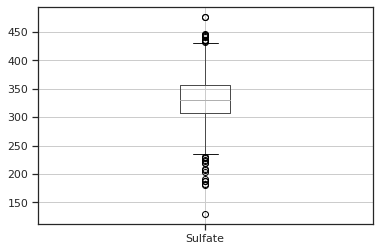

In [246]:
print("Boxplot kolom 'Sulfate' bagian awal")
sulfate_awal.boxplot(["Sulfate"])

Boxplot kolom 'Sulfate' bagian akhir


<AxesSubplot:>

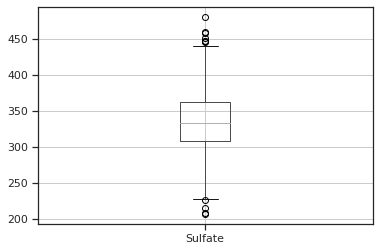

In [247]:
print("Boxplot kolom 'Sulfate' bagian akhir")
sulfate_akhir.boxplot(["Sulfate"])


2. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.15?

In [249]:
n1 = wp['OrganicCarbon'].count() // 2
n2 = wp['OrganicCarbon'].count() - n1

oc_awal = wp.iloc[:n1,:]
oc_akhir = wp.iloc[n2:,:]

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("#### 1. Hipotesis nol"))
display(Markdown("$\nH_0 : \\mu_1 - \\mu_2 = 0.15$"))

display(Markdown("#### 2. Hipotesis alternatif"))
display(Markdown("$\nH_1 : \\mu_1 - \\mu_2 > 0.15$ (Tipe tes: *one-tailed test)*"))

display(Markdown("#### 3. Tingkat signifikan $\\alpha = 0.05$"))

display(Markdown("#### 4. Uji statistik dan daerah kritis"))
display(Markdown("Uji test kali ini menggunakan **T-Test**. Kolom *OrganicCarbon* berdistribusi normal dengan derajat kebebasan:"))
display(Markdown("\n$= n_1 + n_2 - 2 \n= " + str(n1) + "+" + str(n2) + " - 2 =" + str(n1 + n2 - 2) +"$"))
display(Markdown("Dengan nilai derajat kebebasan tersebut, daerah kritis didapat dengan nilai $t' > 1.645613$"))

display(Markdown("#### 5. Perhitungan nilai uji statistik dan p-value"))
xbar1, xbar2 = oc_awal['OrganicCarbon'].mean(), oc_akhir['OrganicCarbon'].mean()
var1, var2 = oc_awal['OrganicCarbon'].var(), oc_akhir['OrganicCarbon'].var()
d0 = n1 - n2

display(Markdown("$\\bar{X}_1 = "+ str(xbar1) +"$"))
display(Markdown("$\\bar{X}_2 = " + str(xbar2) +"$"))
display(Markdown("$S^2_1 = "+ str(var1) +"$"))
display(Markdown("$S^2_2 = " + str(var2) +"$"))
display(Markdown("$n_1 = "+ str(n1) +",n_2 = "+ str(n2) +"$"))
display(Markdown("$\nt' = \\frac{(\\bar{X}_1 - \\bar{X}_2)-d_0}{s_p\\sqrt{\\frac{1}{n_1} + \\frac{1}{n_2}}}$"))
display(Markdown("dengan $d_0 = \\mu_1 - \\mu_2 = " + str(d0) +"$, dan"))
display(Markdown("$\ns^2_p = \\frac{S^2_1(n_1-1)+S^2_2(n_2-1)}{n_1 + n_2 - 2}$"))

sp2 = (var1 * (n1 - 1) + var2 * (n2 - 1))/(n1 + n2 - 2)

display(Markdown("didapat $s^2_p =" + str(sp2) + "$, sehingga $t' = " +str(((xbar1 - xbar2) - d0)/((sp2**0.5)*((1/n1) + (1/n2))**0.5))+"$"))

display(Markdown("#### 6. Kesimpulan"))
display(Markdown("**$H_0$ TIDAK DITOLAK** karena nilai $t'$ yang didapat **TIDAK terletak** di daerah kritis, yaitu $t' > 1.645613$\n"))


Misal bagian awal = 1 dan bagian akhir = 2

#### 1. Hipotesis nol

$
H_0 : \mu_1 - \mu_2 = 0.15$

#### 2. Hipotesis alternatif

$
H_1 : \mu_1 - \mu_2 > 0.15$ (Tipe tes: *one-tailed test)*

#### 3. Tingkat signifikan $\alpha = 0.05$

#### 4. Uji statistik dan daerah kritis

Uji test kali ini menggunakan **T-Test**. Kolom *OrganicCarbon* berdistribusi normal dengan derajat kebebasan:


$= n_1 + n_2 - 2 
= 1005+1005 - 2 =2008$

Dengan nilai derajat kebebasan tersebut, daerah kritis didapat dengan nilai $t' > 1.645613$

#### 5. Perhitungan nilai uji statistik dan p-value

$\bar{X}_1 = 14.253972723723393$

$\bar{X}_2 = 14.461907080372756$

$S^2_1 = 11.230287224380323$

$S^2_2 = 10.880581782847479$

$n_1 = 1005,n_2 = 1005$

$
t' = \frac{(\bar{X}_1 - \bar{X}_2)-d_0}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$

dengan $d_0 = \mu_1 - \mu_2 = 0$, dan

$
s^2_p = \frac{S^2_1(n_1-1)+S^2_2(n_2-1)}{n_1 + n_2 - 2}$

didapat $s^2_p =11.0554345036139$, sehingga $t' = -1.401865597485335$

#### 6. Kesimpulan

**$H_0$ TIDAK DITOLAK** karena nilai $t'$ yang didapat **TIDAK terletak** di daerah kritis, yaitu $t' > 1.645613$


Boxplot kolom 'OrganicCarbon' bagian awal


<AxesSubplot:>

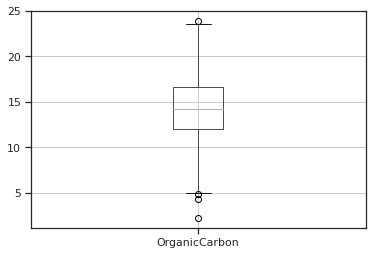

In [250]:
print("Boxplot kolom 'OrganicCarbon' bagian awal")
oc_awal.boxplot(["OrganicCarbon"])

Boxplot kolom 'OrganicCarbon' bagian akhir


<AxesSubplot:>

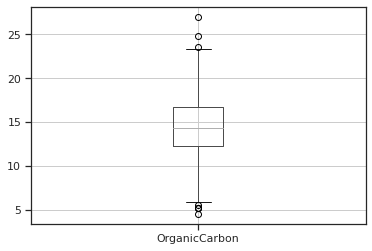

In [251]:
print("Boxplot kolom 'OrganicCarbon' bagian akhir")
oc_akhir.boxplot(["OrganicCarbon"])

